In [15]:
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages')
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
import glob
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [39]:
files = glob.glob('/Users/ikhwankim/Downloads/ling400_final/finaltexthamilton/txts/by_sentences/*.txt')
corp_list = {}

for filename in files:
        file = open(filename, 'r')
        corp = file.read()
        corp2 = []
        for sentences in corp.split('\n'):
            if sentences != '':
                corp2.append(sentences)
        reg = re.compile(r'\/([A-Z]*)\.txt')
        character_name = reg.findall(filename)[0]
        corp_list[character_name] = (corp2)
        file.close()

In [41]:
corp_list['BURR']

['bastard orphan son whore Scotsman drop middle Forgotten spot Caribbean providence Impoverished squalor grow hero scholar',
 'well word get around say  kid insane man  take collection send mainland  get education forget whence come world gon na know name name man ',
 'would nothin  leave someone less astute woulda dead destitute without cent restitution start workin  clerkin  late mother s landlord tradin  sugar cane rum thing afford scammin  every book get hand plannin  future see stand bow ship head new land New York new man',
 'ship harbor see spot another immigrant Comin  bottom enemy destroy rep America forget',
 'I I damn fool shoot',
 'name man',
 'depend ask',
 'I get nervous',
 'punch bursar',
 'parent  die wish pass',
 'talk let I offer free advice talk less',
 'smile',
 'let know',
 'wan na get ahead',
 'fool run mouth wind dead',
 ' like',
 'good luck takin  stand spit I  sit see land',
 'genius lower voice keep trouble double choice I situation fraught get carefully teach

In [123]:
sid = SentimentIntensityAnalyzer()
sentiment_dict = {}
f = open('all_sentiment_analysis.txt', 'r+')
for characters, bodies in corp_list.items():
    f.write(characters+'\n------------------------------------------------------\n')
    positive = 0
    neutral = 0
    negative = 0
    compound = 0
    pos_inten = 0
    neg_inten = 0
    for sentence in bodies:
        f.write(sentence + '\n')
        ss = sid.polarity_scores(sentence)
        compound += ss['compound']
        if ss['pos'] > ss['neg'] and ss['pos'] > ss['neu']:
            positive += 1
            pos_inten += ss['compound']
        elif ss['neg'] > ss['pos'] and ss['neg'] > ss['neu']:
            negative += 1
            neg_inten += -ss['compound']
        elif ss['neu'] > ss['pos'] and ss['neu'] > ss['neg']:
            neutral += 1
        f.write(str(ss) + '\n\n')
    sentiment_dict[characters] = {'sentence_count': len(bodies), 'positive': positive, \
                                 'negative': negative, 'neutral': neutral, 'compound': compound, \
                                 'pos_inten': pos_inten / positive, 'neg_inten': neg_inten / negative}
f.close()

In [124]:
for key, value in sentiment_dict.items():
    print(key)
    for key,value in value.items():
        print(key+':', value)
    print('\n')

MULLIGAN
sentence_count: 18
positive: 2
negative: 2
neutral: 14
compound: 0.4106999999999999
pos_inten: 0.30585
neg_inten: 0.4491


LAFAYETTE
sentence_count: 26
positive: 4
negative: 2
neutral: 18
compound: 1.6322999999999999
pos_inten: 0.66605
neg_inten: 0.6716500000000001


ENSEMBLE
sentence_count: 82
positive: 5
negative: 2
neutral: 74
compound: 2.5854000000000004
pos_inten: 0.5877600000000001
neg_inten: 0.55945


JEFFERSON
sentence_count: 69
positive: 10
negative: 4
neutral: 55
compound: 3.3613
pos_inten: 0.51379
neg_inten: 0.38785000000000003


ANGELICA
sentence_count: 55
positive: 10
negative: 6
neutral: 38
compound: 5.1278
pos_inten: 0.43061
neg_inten: 0.36846666666666666


WASHINGTON
sentence_count: 96
positive: 9
negative: 11
neutral: 73
compound: 1.8114999999999992
pos_inten: 0.467788888888889
neg_inten: 0.47839090909090914


BURR
sentence_count: 181
positive: 30
negative: 19
neutral: 131
compound: 7.110600000000001
pos_inten: 0.4562833333333334
neg_inten: 0.5345


HAMILTON
s

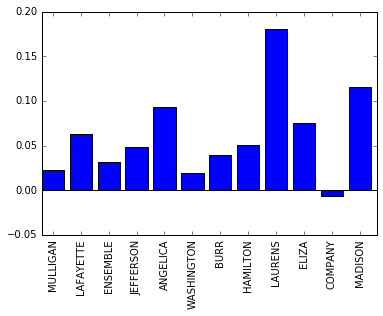

In [102]:
from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure()

OX = sentiment_dict.keys()
OY = [x['compound']/x['sentence_count'] for x in sentiment_dict.values()]
ind = np.arange(len(OY))
      
plt.bar(ind, OY)
plt.xticks(ind+.4, OX, rotation=90)
plt.axhline(y = 0, color='black')
plt.savefig("compound.png")
plt.show()

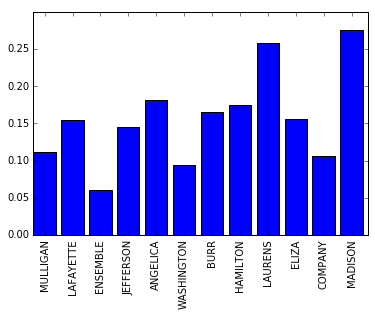

In [103]:
OY = [x['positive']/x['sentence_count'] for x in sentiment_dict.values()]
ind = np.arange(len(OY))
      
plt.bar(ind, OY)
plt.xticks(ind+.4, OX, rotation=90)
plt.ylim(ymax=.3)
      
plt.savefig("positive.png")
plt.show()

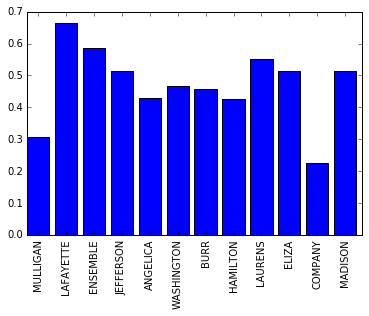

In [125]:
# Compound score divided by net positive rate
OY = [x['pos_inten']for x in sentiment_dict.values()]
ind = np.arange(len(OY))
      
plt.bar(ind, OY)
plt.xticks(ind+.4, OX, rotation=90)
plt.savefig("pos_intensity.png")
plt.show()

In [130]:
OY = [x['neg_inten']for x in sentiment_dict.values()]
OY

[0.4491,
 0.6716500000000001,
 0.55945,
 0.38785000000000003,
 0.36846666666666666,
 0.47839090909090914,
 0.5345,
 0.46412608695652163,
 0.3895,
 0.3952,
 0.6044375000000001,
 0.34895]

In [129]:
OX

dict_keys(['MULLIGAN', 'LAFAYETTE', 'ENSEMBLE', 'JEFFERSON', 'ANGELICA', 'WASHINGTON', 'BURR', 'HAMILTON', 'LAURENS', 'ELIZA', 'COMPANY', 'MADISON'])

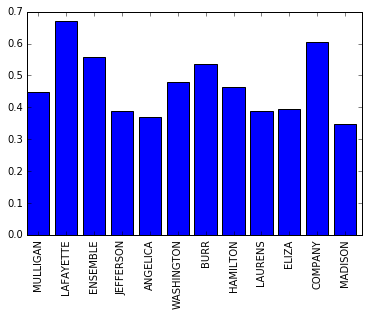

In [127]:
# Compound score divided by net positive rate
OY = [x['neg_inten']for x in sentiment_dict.values()]
ind = np.arange(len(OY))
      
plt.bar(ind, OY)
plt.xticks(ind+.4, OX, rotation=90)
plt.savefig("neg_intensity.png")
plt.show()

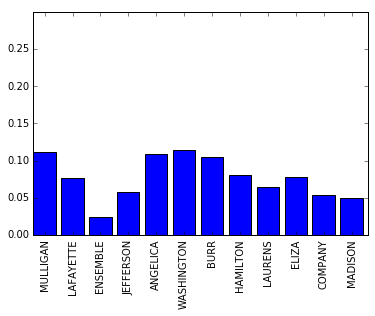

In [105]:
OY = [x['negative']/x['sentence_count'] for x in sentiment_dict.values()]
ind = np.arange(len(OY))
      
plt.bar(ind, OY)
plt.xticks(ind+.4, OX, rotation=90)
plt.ylim(ymax=.3)

plt.savefig("negative.png")
plt.show()